## 📌 Step 1: Importing Required Libraries

In [1]:
import pandas as pd
from wordcloud import WordCloud
import zipfile
import os

## 🗂️ Step 2: Loading Datasets

### 📌 Sentiment Analysis Datasets
1️⃣ **Sentiment Dataset** → *Twitter Sentiment Dataset.csv*  
2️⃣ **Hate Speech Dataset** → *Twitter Sentiment Analysis (Hatred Speech) Training Dataset.csv*  
3️⃣ **Emotion Classification Dataset** → *Twitter Emotion Classification Training Dataset.csv*  
4️⃣ **Customer Support Dataset** → *Customer Support on Twitter Dataset.csv*  


In [2]:
# Define the common directory path
base_dir = "/content/drive/MyDrive/MTech/Sem 2/Mini Project/Mini Project All/Datasets/Selected /Training datasets/"

# Define dataset file names
dataset_files = {
    "Sentiment Dataset": "Twitter Sentiment Dataset.csv",
    "Hate Speech Dataset": "Twitter Sentiment Analysis (Hatred Speech) Training Dataset.csv",
    "Emotion Classification Dataset": "Twitter Emotion Classification Training Dataset.csv",
    "Customer Support Dataset": "Customer Support on Twitter Dataset.csv"
}


In [3]:
# Load datasets into a dictionary
datasets = {}
for name, file in dataset_files.items():
    file_path = base_dir + file  # Construct full path
    try:
        datasets[name] = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')
        print(f"✅ Loaded: {name}")
    except Exception as e:
        print(f"❌ Error loading {name}: {e}")

✅ Loaded: Sentiment Dataset
✅ Loaded: Hate Speech Dataset
✅ Loaded: Emotion Classification Dataset
✅ Loaded: Customer Support Dataset


Display the Datasets

In [4]:
for name, df in datasets.items():
    print(f"\n🔹 Dataset: {name}")
    print(df.head())
    print("=" * 80)


🔹 Dataset: Sentiment Dataset
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

🔹 Dataset: Hate Speech Dataset
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

🔹 Dataset: Emotion Classification Dataset
                                                text  label
0                            i didnt feel humiliated      0
1  i can go f

#Renaming for uniformity

In [9]:
# Rename label/category column
datasets["Sentiment Dataset"].rename(columns={"clean_text": "text", "category": "sentiment_label"}, inplace=True)
datasets["Hate Speech Dataset"].rename(columns={"tweet": "text", "label": "hate_speech_label"}, inplace=True)
datasets["Emotion Classification Dataset"].rename(columns={"label": "emotion_label"}, inplace=True)


In [10]:
for name, df in datasets.items():
    print(f"\n🔹 Dataset: {name}")
    print(df.shape)
    print("=" * 80)


🔹 Dataset: Sentiment Dataset
(162980, 2)

🔹 Dataset: Hate Speech Dataset
(31962, 3)

🔹 Dataset: Emotion Classification Dataset
(16000, 2)

🔹 Dataset: Customer Support Dataset
(2811774, 7)


In [11]:
for name, df in datasets.items():
    print(f"\n🔹 Dataset: {name}")
    print(df.head())
    print("=" * 80)


🔹 Dataset: Sentiment Dataset
                                                text  sentiment_label
0  when modi promised “minimum government maximum...             -1.0
1  talk all the nonsense and continue all the dra...              0.0
2  what did just say vote for modi  welcome bjp t...              1.0
3  asking his supporters prefix chowkidar their n...              1.0
4  answer who among these the most powerful world...              1.0

🔹 Dataset: Hate Speech Dataset
   id  hate_speech_label                                               text
0   1                  0   @user when a father is dysfunctional and is s...
1   2                  0  @user @user thanks for #lyft credit i can't us...
2   3                  0                                bihday your majesty
3   4                  0  #model   i love u take with u all the time in ...
4   5                  0             factsguide: society now    #motivation

🔹 Dataset: Emotion Classification Dataset
                   

In [12]:
for name, df in datasets.items():
    print(f"\n🔹 Dataset: {name}")
    print(df.columns)
    print("=" * 80)


🔹 Dataset: Sentiment Dataset
Index(['text', 'sentiment_label'], dtype='object')

🔹 Dataset: Hate Speech Dataset
Index(['id', 'hate_speech_label', 'text'], dtype='object')

🔹 Dataset: Emotion Classification Dataset
Index(['text', 'emotion_label'], dtype='object')

🔹 Dataset: Customer Support Dataset
Index(['tweet_id', 'author_id', 'inbound', 'created_at', 'text',
       'response_tweet_id', 'in_response_to_tweet_id'],
      dtype='object')


##📊 Step 3: Exploratory Data Analysis (EDA)
We will analyze each dataset separately in the following manner:

1️⃣ Data Overview
2️⃣ Handling Missing Values
3️⃣ Sentiment Distribution
4️⃣ Text Length Analysis
5️⃣ Word Cloud & N-Gram Analysis

## 📍 Dataset 1: Sentiment Dataset
### 📌 Data Overview  
Understanding the structure of the dataset:
- Number of rows and columns  
- Column names and data types  
- Presence of missing values

In [13]:
datasets["Sentiment Dataset"].head(15)

text  sentiment_label
0   when modi promised “minimum government maximum...             -1.0
1   talk all the nonsense and continue all the dra...              0.0
2   what did just say vote for modi  welcome bjp t...              1.0
3   asking his supporters prefix chowkidar their n...              1.0
4   answer who among these the most powerful world...              1.0
5            kiya tho refresh maarkefir comment karo               0.0
6   surat women perform yagna seeks divine grace f...              0.0
7   this comes from cabinet which has scholars lik...              0.0
8   with upcoming election india saga going import...              1.0
9                          gandhi was gay does modi                1.0
10  things like demonetisation gst goods and servi...              1.0
11  hope tuthukudi people would prefer honest well...              1.0
12                  calm waters wheres the modi wave               1.0
13  one vote can make all the difference anil kapo...              0.0
14  one vote can make all the difference anil kapo...              0.0

In [15]:
# Function to show basic information of a dataset
def dataset_info(df, name):
    print(f"\n🔍 Dataset: {name}")
    print("-" * 50)
    print(f"📏 Shape: {df.shape}")
    print(f"\n📜 Column Names:\n{df.columns.tolist()}")
    print("\n🔢 Data Types:")
    print(df.dtypes)
    print("\n❓ Missing Values:")
    print(df.isnull().sum())
    print("=" * 80)

# Apply function to Sentiment Dataset
dataset_info(datasets["Sentiment Dataset"], "Sentiment Dataset")



🔍 Dataset: Sentiment Dataset
--------------------------------------------------
📏 Shape: (162980, 2)

📜 Column Names:
['text', 'sentiment_label']

🔢 Data Types:
text                object
sentiment_label    float64
dtype: object

❓ Missing Values:
text               4
sentiment_label    7
dtype: int64


### ❓ Handling Missing Values  
Checking for missing values and deciding whether to drop or fill them.

In [16]:
# Check missing values percentage
missing_percent = datasets["Sentiment Dataset"].isnull().mean() * 100
print("🔍 Missing Value Percentage:\n", missing_percent)

# Drop rows with missing values (if necessary)
datasets["Sentiment Dataset"].dropna(inplace=True)


🔍 Missing Value Percentage:
 text               0.002454
sentiment_label    0.004295
dtype: float64


### 📊 Sentiment Distribution  
We will check how the sentiment labels (-1, 0, 1) are distributed.


In [60]:
# Get unique labels
unique_labels = datasets["Sentiment Dataset"]['sentiment_label'].unique()

# Display 3 samples per label
for category in sorted(unique_labels):
    print(f"\n🟨 Samples for Label {category}:")
    samples = datasets["Sentiment Dataset"][datasets["Sentiment Dataset"]['sentiment_label'] == category].head(15)
    for i, row in samples.iterrows():
        print(f"• {row['text']}")  # Truncate for readability


🟨 Samples for Label -1.0:
• when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
• vote such party and leadershipwho can take fast and firm action none other than narendra damodardas modi and bjp party 
• didn’ write chowkidar does mean ’ anti modi try visit the plz not all who haven’ used are anti 
• with firm belief the leadership shri narendra modi bjp entering into politics given form file nomination for the khammam parliamentary seat proceeding khammam today 
• sultanpur uttar pradesh loksabha candidate select pawan kumar pandey actually public want given vote modi but your current condidate not popular district your candidate bsp candidate sonbhadra singh
• thiugh nehru not alive but still alive heart modi for every failure nehru responsible 
• modi govts slashing indias education budget clear indicator that they dont care 

<ipython-input-18-b5d366aa04dd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=datasets["Sentiment Dataset"]["sentiment_label"], palette="coolwarm")


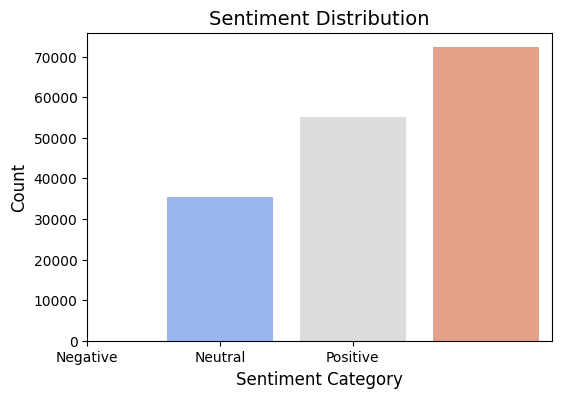

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=datasets["Sentiment Dataset"]["sentiment_label"], palette="coolwarm")
plt.title("Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1, -1], labels=["Neutral", "Positive", "Negative"])
plt.show()


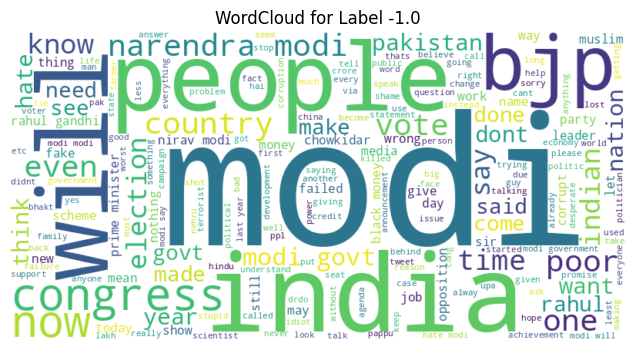

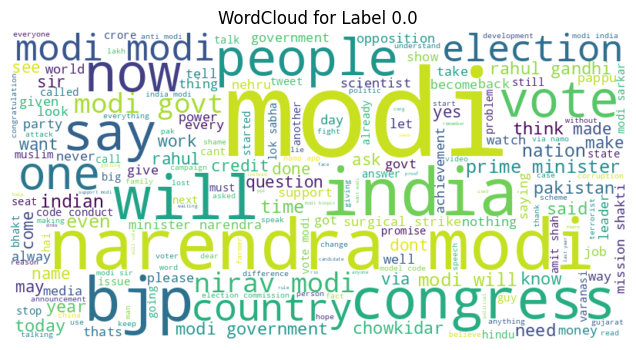

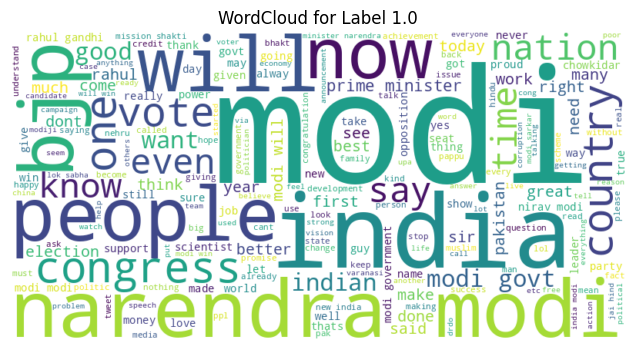

In [19]:
# Generate WordCloud for each label
for category in sorted(unique_labels):
    text_data = " ".join(datasets["Sentiment Dataset"][datasets["Sentiment Dataset"]['sentiment_label'] == category]['text'].astype(str))

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for Label {category}")
    plt.show()


### 📏 Text Length Analysis  
We will analyze the length of tweets to understand text distribution.


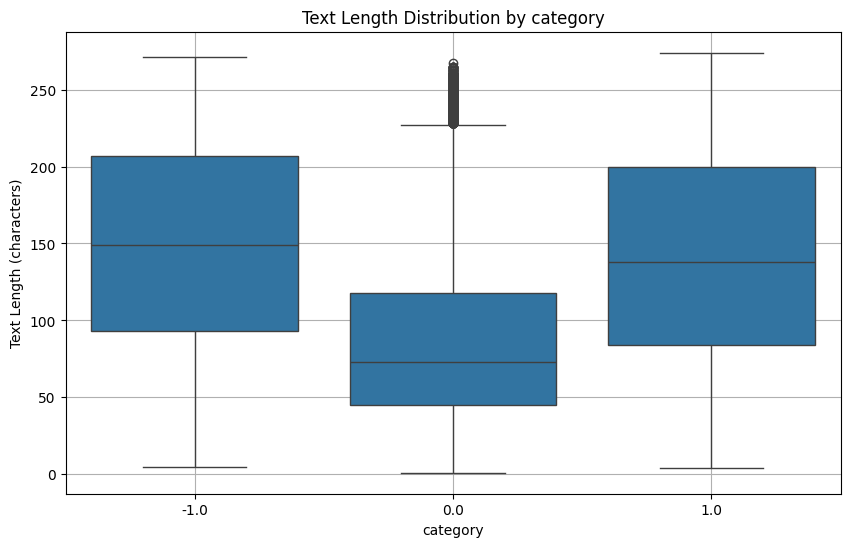

In [20]:
# Add a column for text length
datasets["Sentiment Dataset"]['text_length'] = datasets["Sentiment Dataset"]['text'].astype(str).apply(len)

# Plot distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=datasets["Sentiment Dataset"], x='sentiment_label', y='text_length')
plt.title("Text Length Distribution by category")
plt.xlabel("category")
plt.ylabel("Text Length (characters)")
plt.grid(True)
plt.show()


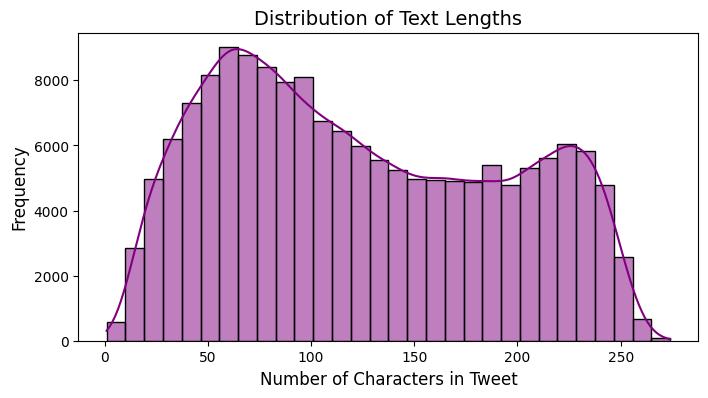

In [21]:
# Create a new column for text length
datasets["Sentiment Dataset"]["text_length"] = datasets["Sentiment Dataset"]["text"].apply(len)

# Plot distribution of text lengths
plt.figure(figsize=(8, 4))
sns.histplot(datasets["Sentiment Dataset"]["text_length"], bins=30, kde=True, color="purple")
plt.title("Distribution of Text Lengths", fontsize=14)
plt.xlabel("Number of Characters in Tweet", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


In [22]:
datasets["Sentiment Dataset"].head()

text  sentiment_label  \
0  when modi promised “minimum government maximum...             -1.0   
1  talk all the nonsense and continue all the dra...              0.0   
2  what did just say vote for modi  welcome bjp t...              1.0   
3  asking his supporters prefix chowkidar their n...              1.0   
4  answer who among these the most powerful world...              1.0   

   text_length  
0          210  
1           68  
2          117  
3          212  
4           81

### ☁ Word Cloud & N-Gram Analysis  
We will visualize the most frequent words in the dataset.


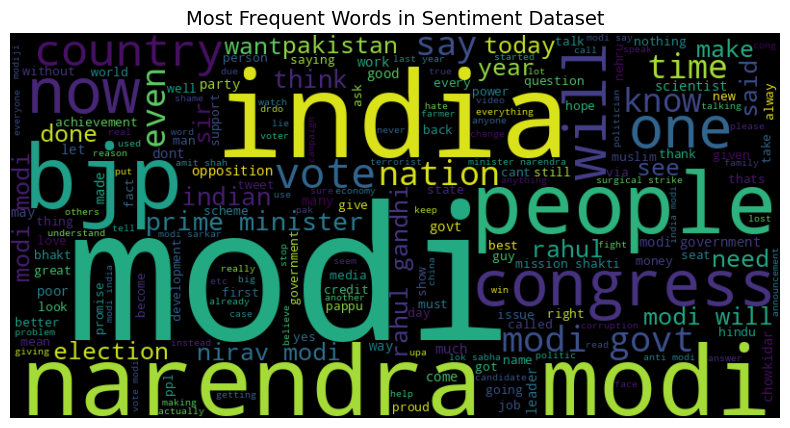

In [23]:
from wordcloud import WordCloud

# Generate Word Cloud
text_data = " ".join(datasets["Sentiment Dataset"]["text"])
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text_data)

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Sentiment Dataset", fontsize=14)
plt.show()


## 📍 Dataset 2: Hate Speech Dataset
### 📌 Data Overview  
Understanding the structure of the dataset:
- Number of rows and columns  
- Column names and data types  
- Presence of missing values

In [24]:
datasets["Hate Speech Dataset"].head(30)

id  hate_speech_label                                               text
0    1                  0   @user when a father is dysfunctional and is s...
1    2                  0  @user @user thanks for #lyft credit i can't us...
2    3                  0                                bihday your majesty
3    4                  0  #model   i love u take with u all the time in ...
4    5                  0             factsguide: society now    #motivation
5    6                  0  [2/2] huge fan fare and big talking before the...
6    7                  0   @user camping tomorrow @user @user @user @use...
7    8                  0  the next school year is the year for exams.ð...
8    9                  0  we won!!! love the land!!! #allin #cavs #champ...
9   10                  0   @user @user welcome here !  i'm   it's so #gr...
10  11                  0   â #ireland consumer price index (mom) climb...
11  12                  0  we are so selfish. #orlando #standwithorlando ...
12  13                  0  i get to see my daddy today!!   #80days #getti...
13  14                  1  @user #cnn calls #michigan middle school 'buil...
14  15                  1  no comment!  in #australia   #opkillingbay #se...
15  16                  0  ouch...junior is angryð#got7 #junior #yugyo...
16  17                  0  i am thankful for having a paner. #thankful #p...
17  18                  1                             retweet if you agree! 
18  19                  0  its #friday! ð smiles all around via ig use...
19  20                  0  as we all know, essential oils are not made of...
20  21                  0  #euro2016 people blaming ha for conceded goal ...
21  22                  0  sad little dude..   #badday #coneofshame #cats...
22  23                  0  product of the day: happy man #wine tool  who'...
23  24                  1    @user @user lumpy says i am a . prove it lumpy.
24  25                  0   @user #tgif   #ff to my #gamedev #indiedev #i...
25  26                  0  beautiful sign by vendor 80 for $45.00!! #upsi...
26  27                  0   @user all #smiles when #media is   !! ðð...
27  28                  0  we had a great panel on the mediatization of t...
28  29                  0        happy father's day @user ðððð  
29  30                  0  50 people went to nightclub to have a good nig...

In [25]:
# Apply function to Sentiment Dataset
dataset_info(datasets["Hate Speech Dataset"], "Hate Speech Dataset")


🔍 Dataset: Hate Speech Dataset
--------------------------------------------------
📏 Shape: (31962, 3)

📜 Column Names:
['id', 'hate_speech_label', 'text']

🔢 Data Types:
id                    int64
hate_speech_label     int64
text                 object
dtype: object

❓ Missing Values:
id                   0
hate_speech_label    0
text                 0
dtype: int64


### ❓ Handling Missing Values  
Checking for missing values and deciding whether to drop or fill them.

In [26]:
# Check missing values percentage
missing_percent = datasets["Hate Speech Dataset"].isnull().mean() * 100
print("🔍 Missing Value Percentage:\n", missing_percent)

# Drop rows with missing values (if necessary)
datasets["Hate Speech Dataset"].dropna(inplace=True)


🔍 Missing Value Percentage:
 id                   0.0
hate_speech_label    0.0
text                 0.0
dtype: float64


### 📊 Hate Speech Label Distribution  
We will check how the hate speech labels (e.g., Hate Speech, Offensive, Neutral) are distributed.


In [53]:
# Display 3 samples per label
labels = datasets["Hate Speech Dataset"]['hate_speech_label'].unique()

for label in sorted(labels):
    print(f"\n🟥 Samples for Label {label} ({'Hate' if label == 1 else 'Not Hate'}):")
    samples = datasets["Hate Speech Dataset"][datasets["Hate Speech Dataset"]['hate_speech_label'] == label].head(15)
    for i, row in samples.iterrows():
        print(f"• {row['text']}")



🟥 Samples for Label 0 (Not Hate):
•  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
• @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
•   bihday your majesty
• #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
•  factsguide: society now    #motivation
• [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  
•  @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
• the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl
• we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦ 
•  @user @user welcome here !  i'm   it's so #gr8 ! 
•  â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #s

<ipython-input-28-9b01e73fcc8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=datasets["Hate Speech Dataset"]["hate_speech_label"], palette="magma")


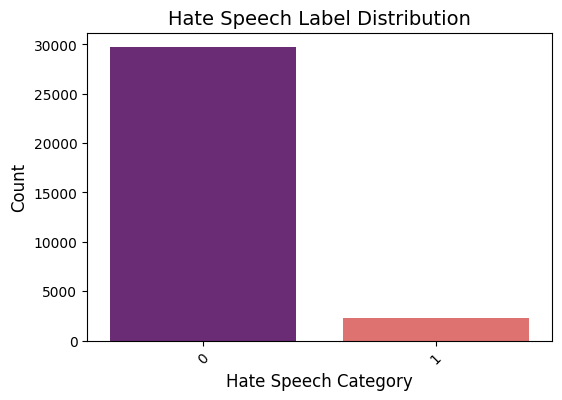

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for Hate Speech Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=datasets["Hate Speech Dataset"]["hate_speech_label"], palette="magma")
plt.title("Hate Speech Label Distribution", fontsize=14)
plt.xlabel("Hate Speech Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


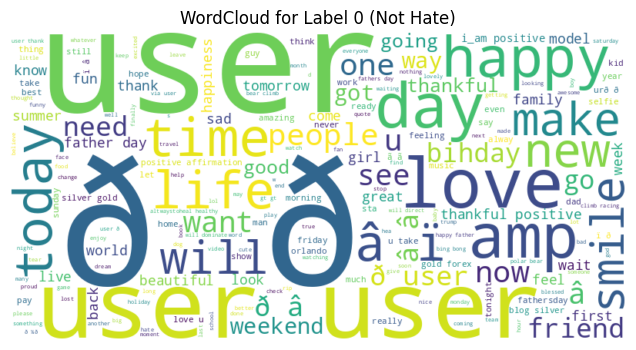

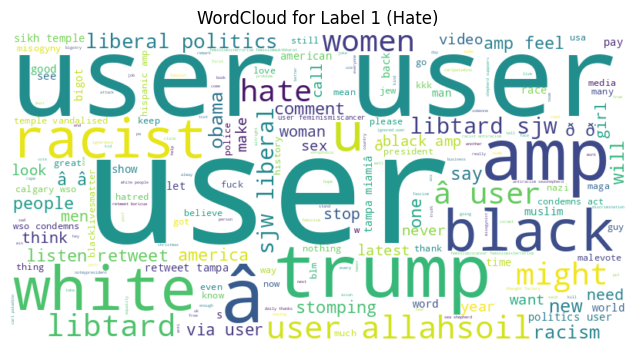

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate WordClouds
for label in sorted(labels):
    text_data = " ".join(datasets["Hate Speech Dataset"][datasets["Hate Speech Dataset"]['hate_speech_label'] == label]['text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for Label {label} ({'Hate' if label == 1 else 'Not Hate'})")
    plt.show()


### 📏 Text Length Analysis  
We will analyze the length of tweets to understand text distribution.


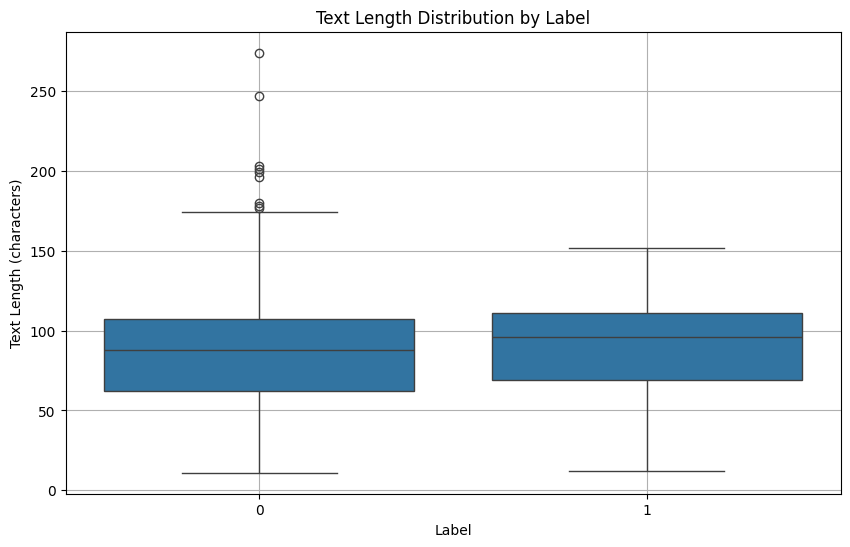

In [30]:
import seaborn as sns

# Add tweet length column
datasets["Hate Speech Dataset"]['text_length'] = datasets["Hate Speech Dataset"]['text'].astype(str).apply(len)

# Boxplot of lengths
plt.figure(figsize=(10, 6))
sns.boxplot(data=datasets["Hate Speech Dataset"], x='hate_speech_label', y='text_length')
plt.title("Text Length Distribution by Label")
plt.xlabel("Label")
plt.ylabel("Text Length (characters)")
plt.grid(True)
plt.show()


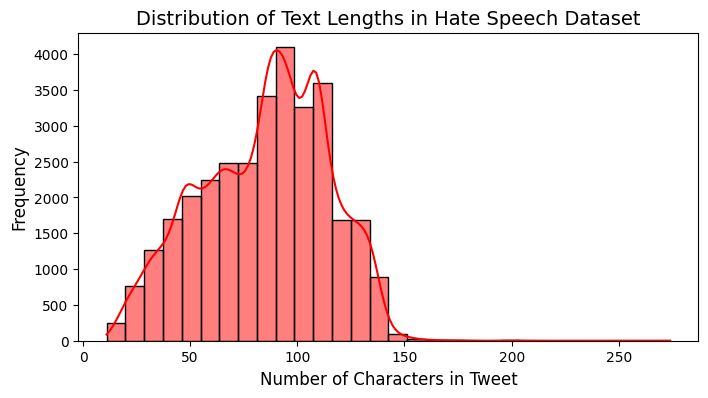

In [31]:
# Create a new column for text length
datasets["Hate Speech Dataset"]["text_length"] = datasets["Hate Speech Dataset"]["text"].apply(len)

# Plot distribution of text lengths
plt.figure(figsize=(8, 4))
sns.histplot(datasets["Hate Speech Dataset"]["text_length"], bins=30, kde=True, color="red")
plt.title("Distribution of Text Lengths in Hate Speech Dataset", fontsize=14)
plt.xlabel("Number of Characters in Tweet", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


In [32]:
datasets["Hate Speech Dataset"].head()

id  hate_speech_label                                               text  \
0   1                  0   @user when a father is dysfunctional and is s...   
1   2                  0  @user @user thanks for #lyft credit i can't us...   
2   3                  0                                bihday your majesty   
3   4                  0  #model   i love u take with u all the time in ...   
4   5                  0             factsguide: society now    #motivation   

   text_length  
0          102  
1          122  
2           21  
3           86  
4           39

### ☁ Word Cloud & N-Gram Analysis  
We will visualize the most frequent words in the dataset.


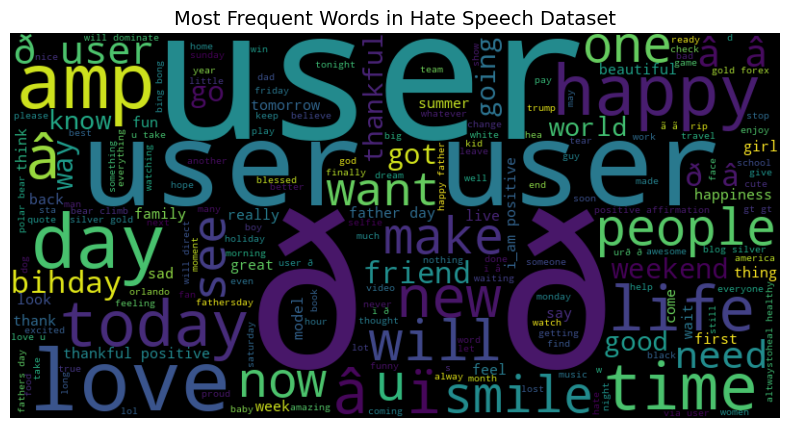

In [33]:
from wordcloud import WordCloud

# Generate Word Cloud
text_data = " ".join(datasets["Hate Speech Dataset"]["text"])
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text_data)

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Hate Speech Dataset", fontsize=14)
plt.show()


## 📍 Dataset 3: Emotion Classification Dataset
### 📌 Data Overview  
Understanding the structure of the dataset:
- Number of rows and columns  
- Column names and data types  
- Presence of missing values

In [34]:
datasets["Emotion Classification Dataset"].head(15)

text  emotion_label
0                             i didnt feel humiliated              0
1   i can go from feeling so hopeless to so damned...              0
2    im grabbing a minute to post i feel greedy wrong              3
3   i am ever feeling nostalgic about the fireplac...              2
4                                i am feeling grouchy              3
5   ive been feeling a little burdened lately wasn...              0
6   ive been taking or milligrams or times recomme...              5
7   i feel as confused about life as a teenager or...              4
8   i have been with petronas for years i feel tha...              1
9                                 i feel romantic too              2
10  i feel like i have to make the suffering i m s...              0
11  i do feel that running is a divine experience ...              1
12  i think it s the easiest time of year to feel ...              3
13                 i feel low energy i m just thirsty              0
14  i have immense sympathy with the general point...              1

In [54]:
emotion_labels = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}


In [55]:
# Apply function to Sentiment Dataset
dataset_info(datasets["Emotion Classification Dataset"], "Emotion Classification Dataset")



🔍 Dataset: Emotion Classification Dataset
--------------------------------------------------
📏 Shape: (16000, 3)

📜 Column Names:
['text', 'emotion_label', 'text_length']

🔢 Data Types:
text             object
emotion_label     int64
text_length       int64
dtype: object

❓ Missing Values:
text             0
emotion_label    0
text_length      0
dtype: int64


### ❓ Handling Missing Values  
Checking for missing values and deciding whether to drop or fill them.

In [56]:
# Check missing values percentage
missing_percent = datasets["Emotion Classification Dataset"].isnull().mean() * 100
print("🔍 Missing Value Percentage:\n", missing_percent)

# Drop rows with missing values (if necessary)
datasets["Emotion Classification Dataset"].dropna(inplace=True)


🔍 Missing Value Percentage:
 text             0.0
emotion_label    0.0
text_length      0.0
dtype: float64


### 📊 Emotion Label Distribution  
We will check how the sentiment labels (-1, 0, 1) are distributed.


In [58]:
# Print a few samples from each label
for label_id, label_name in emotion_labels.items():
    print(f"\n🟦 Samples for Label {label_id} ({label_name}):")
    samples = datasets["Emotion Classification Dataset"][datasets["Emotion Classification Dataset"]["emotion_label"] == label_id].head(5)
    for _, row in samples.iterrows():
        print(f"• {row['text']}")



🟦 Samples for Label 0 (sadness):
• i didnt feel humiliated
• i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
• ive been feeling a little burdened lately wasnt sure why that was
• i feel like i have to make the suffering i m seeing mean something
• i feel low energy i m just thirsty

🟦 Samples for Label 1 (joy):
• i have been with petronas for years i feel that petronas has performed well and made a huge profit
• i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter
• i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious
• i do not feel reassured anxiety is on each side
• i have the feeling she was amused and delighted

🟦 Samples for Label 2 (love):
• i am ever feeling nostalgic about the fireplace i will kno

<ipython-input-39-c8e80893fcb6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=datasets["Emotion Classification Dataset"]["emotion_label"], palette="viridis")


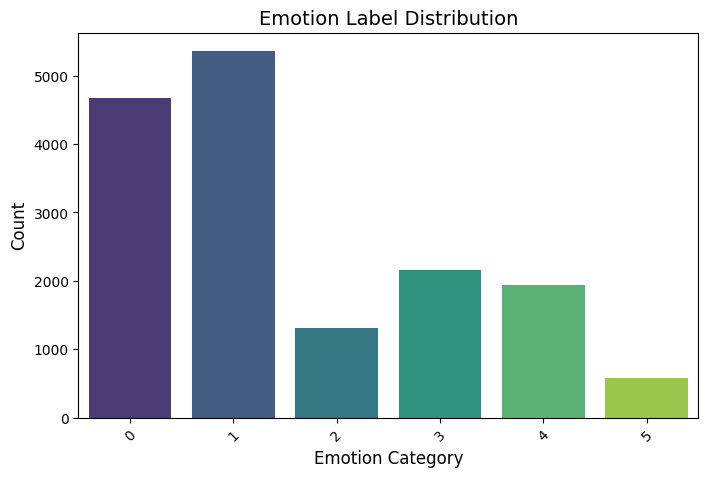

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for Emotion Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=datasets["Emotion Classification Dataset"]["emotion_label"], palette="viridis")
plt.title("Emotion Label Distribution", fontsize=14)
plt.xlabel("Emotion Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


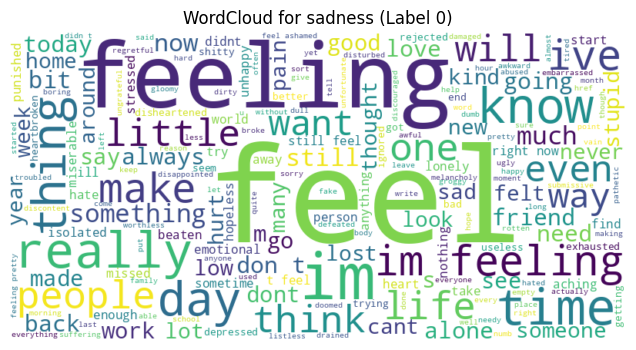

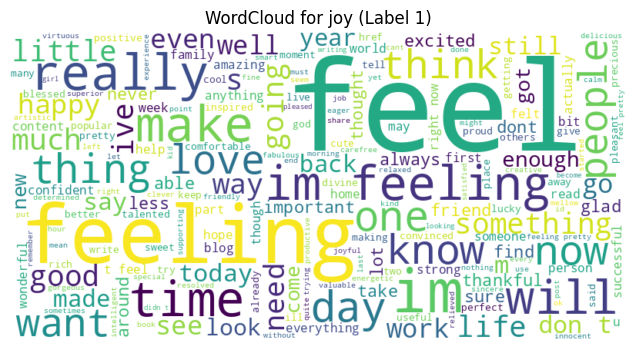

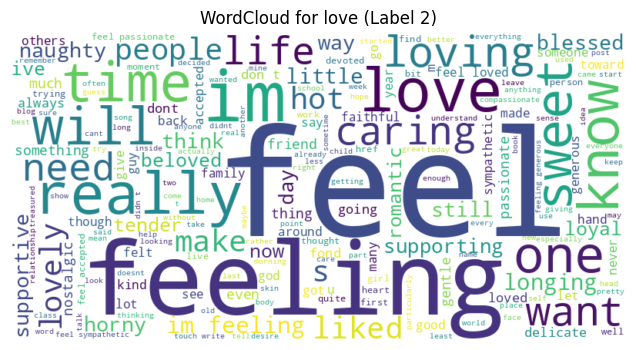

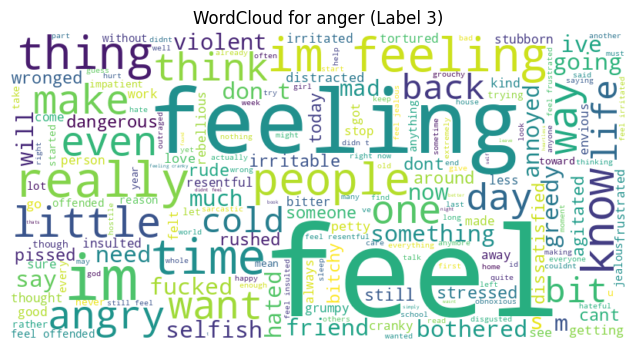

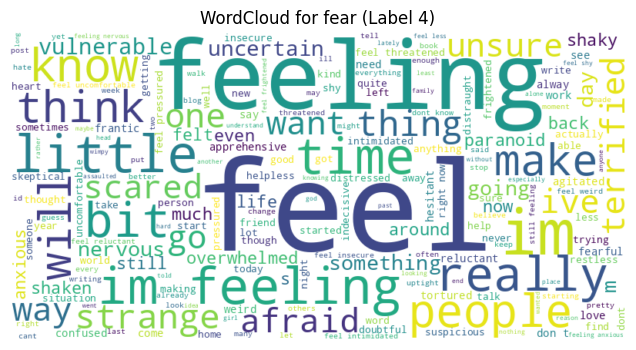

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud for each emotion
for label_id, label_name in emotion_labels.items():
    texts = datasets["Emotion Classification Dataset"][datasets["Emotion Classification Dataset"]["emotion_label"] == label_id]["text"]
    all_text = " ".join(texts.astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {label_name} (Label {label_id})")
    plt.show()


### 📏 Text Length Analysis  
We will analyze the length of tweets to understand text distribution.


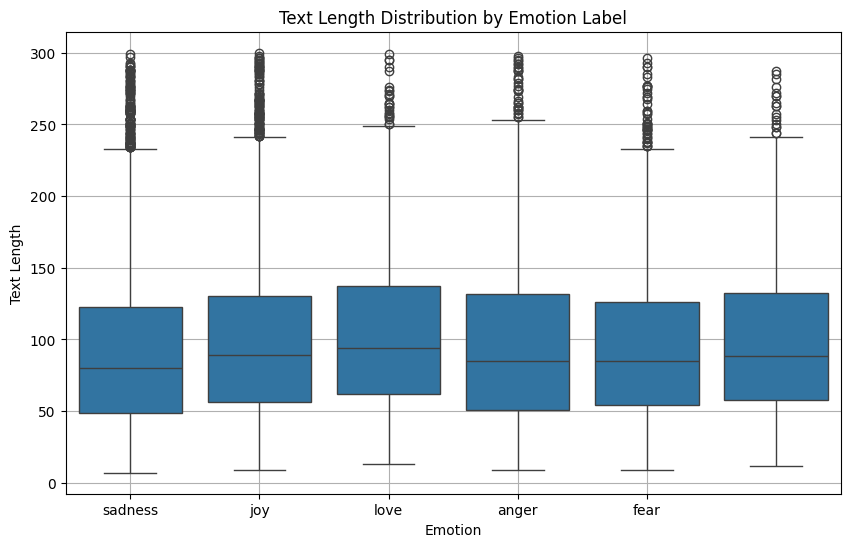

In [41]:
import seaborn as sns

# Compute text lengths
datasets["Emotion Classification Dataset"]["text_length"] = datasets["Emotion Classification Dataset"]["text"].astype(str).apply(len)

# Plot distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=datasets["Emotion Classification Dataset"], x='emotion_label', y='text_length')
plt.xticks(ticks=list(emotion_labels.keys()), labels=list(emotion_labels.values()))
plt.title("Text Length Distribution by Emotion Label")
plt.xlabel("Emotion")
plt.ylabel("Text Length")
plt.grid(True)
plt.show()


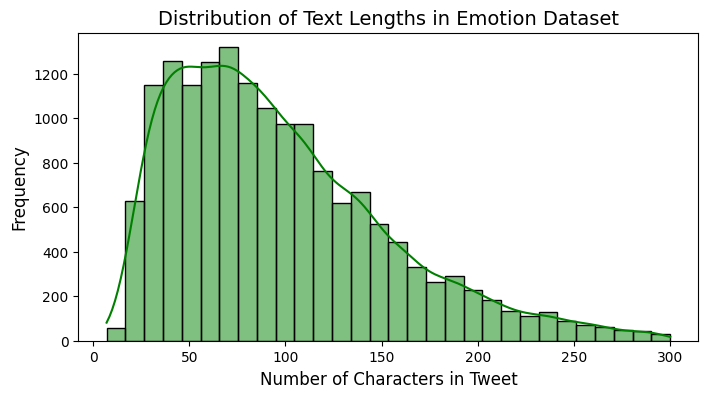

In [42]:
# Create a new column for text length
datasets["Emotion Classification Dataset"]["text_length"] = datasets["Emotion Classification Dataset"]["text"].apply(len)

# Plot distribution of text lengths
plt.figure(figsize=(8, 4))
sns.histplot(datasets["Emotion Classification Dataset"]["text_length"], bins=30, kde=True, color="green")
plt.title("Distribution of Text Lengths in Emotion Dataset", fontsize=14)
plt.xlabel("Number of Characters in Tweet", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


In [43]:
datasets["Emotion Classification Dataset"].head()

text  emotion_label  \
0                            i didnt feel humiliated              0   
1  i can go from feeling so hopeless to so damned...              0   
2   im grabbing a minute to post i feel greedy wrong              3   
3  i am ever feeling nostalgic about the fireplac...              2   
4                               i am feeling grouchy              3   

   text_length  
0           23  
1          108  
2           48  
3           92  
4           20

### ☁ Word Cloud & N-Gram Analysis  
We will visualize the most frequent words in the dataset.


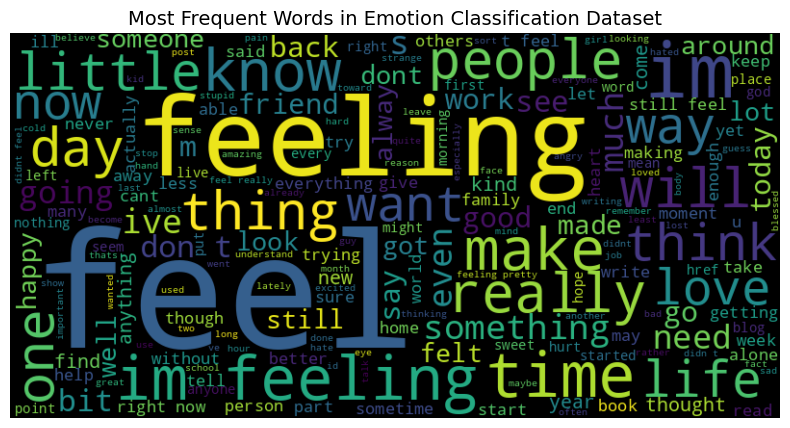

In [44]:
from wordcloud import WordCloud

# Generate Word Cloud
text_data = " ".join(datasets["Emotion Classification Dataset"]["text"])
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text_data)

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Emotion Classification Dataset", fontsize=14)
plt.show()


## Combine the three datasets useless from here--->

In [ ]:
# Create a copy of each dataset with unified schema
sentiment_df = datasets["Sentiment Dataset"].copy()[["clean_text", "category"]]
hate_df = datasets["Hate Speech Dataset"].copy()[["tweet", "label"]].rename(columns={"tweet": "text"})
emotion_df = datasets["Emotion Classification Dataset"].copy()[["text", "label"]]

In [ ]:
sentiment_df["combined_label"] = sentiment_df["category"].map({
    -1.0: "sentiment_negative",
     0.0: "sentiment_neutral",
     1.0: "sentiment_positive"
})
sentiment_df["source"] = "sentiment"


In [ ]:
label_map = {
    0: "emotion_sadness",
    1: "emotion_joy",
    2: "emotion_love",
    3: "emotion_anger",
    4: "emotion_fear",
    5: "emotion_surprise"
}
emotion_df["combined_label"] = emotion_df["label"].map(label_map)
emotion_df["source"] = "emotion"


In [ ]:
hate_df["combined_label"] = hate_df["label"].map({
    0: "hate_none",
    1: "hate_hate"
})
hate_df["source"] = "hate"


In [ ]:
final_df = sentiment_df[["clean_text", "combined_label", "source"]].rename(columns={"clean_text": "text"})
final_df = pd.concat([
    final_df,
    emotion_df[["text", "combined_label", "source"]],
    hate_df[["text", "combined_label", "source"]]
])


In [ ]:
final_df

text      combined_label  \
0      when modi promised “minimum government maximum...  sentiment_negative   
1      talk all the nonsense and continue all the dra...   sentiment_neutral   
2      what did just say vote for modi  welcome bjp t...  sentiment_positive   
3      asking his supporters prefix chowkidar their n...  sentiment_positive   
4      answer who among these the most powerful world...  sentiment_positive   
...                                                  ...                 ...   
31957  ate @user isz that youuu?ðððððð...           hate_none   
31958    to see nina turner on the airwaves trying to...           hate_none   
31959  listening to sad songs on a monday morning otw...           hate_none   
31960  @user #sikh #temple vandalised in in #calgary,...           hate_hate   
31961                   thank you @user for you follow             hate_none   

          source  
0      sentiment  
1      sentiment  
2      sentiment  
3      sentiment  
4      sentiment  
...          ...  
31957       hate  
31958       hate  
31959       hate  
31960       hate  
31961       hate  

[210931 rows x 3 columns]

In [ ]:
final_df.to_csv("unified_dataset_for_synthetic_generation.csv", index=False)


## 📍 Dataset 4: Customer Support Dataset
### 📌 Data Overview  
Understanding the structure of the dataset:
- Number of rows and columns  
- Column names and data types  
- Presence of missing values

In [45]:
datasets["Customer Support Dataset"].head()

tweet_id   author_id  inbound                      created_at  \
0         1  sprintcare    False  Tue Oct 31 22:10:47 +0000 2017   
1         2      115712     True  Tue Oct 31 22:11:45 +0000 2017   
2         3      115712     True  Tue Oct 31 22:08:27 +0000 2017   
3         4  sprintcare    False  Tue Oct 31 21:54:49 +0000 2017   
4         5      115712     True  Tue Oct 31 21:49:35 +0000 2017   

                                                text response_tweet_id  \
0  @115712 I understand. I would like to assist y...                 2   
1      @sprintcare and how do you propose we do that               NaN   
2  @sprintcare I have sent several private messag...                 1   
3  @115712 Please send us a Private Message so th...                 3   
4                                 @sprintcare I did.                 4   

   in_response_to_tweet_id  
0                      3.0  
1                      1.0  
2                      4.0  
3                      5.0  
4                      6.0

In [46]:
# Apply function to Sentiment Dataset
dataset_info(datasets["Customer Support Dataset"], "Customer Support Dataset")


🔍 Dataset: Customer Support Dataset
--------------------------------------------------
📏 Shape: (2811774, 7)

📜 Column Names:
['tweet_id', 'author_id', 'inbound', 'created_at', 'text', 'response_tweet_id', 'in_response_to_tweet_id']

🔢 Data Types:
tweet_id                     int64
author_id                   object
inbound                       bool
created_at                  object
text                        object
response_tweet_id           object
in_response_to_tweet_id    float64
dtype: object

❓ Missing Values:
tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64


### ❓ Handling Missing Values  
Checking for missing values and deciding whether to drop or fill them.

In [47]:
# Check missing values percentage
missing_percent = datasets["Customer Support Dataset"].isnull().mean() * 100
print("🔍 Missing Value Percentage:\n", missing_percent)

# Drop rows with missing values (if necessary)
datasets["Customer Support Dataset"].dropna(inplace=True)


🔍 Missing Value Percentage:
 tweet_id                    0.000000
author_id                   0.000000
inbound                     0.000000
created_at                  0.000000
text                        0.000000
response_tweet_id          37.009696
in_response_to_tweet_id    28.250315
dtype: float64


### 📏 Text Length Analysis  
We will analyze the length of tweets to understand text distribution.


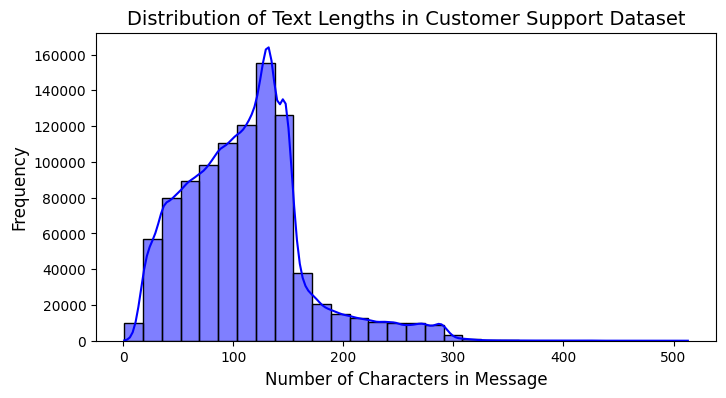

In [48]:
# Create a new column for text length
datasets["Customer Support Dataset"]["text_length"] = datasets["Customer Support Dataset"]["text"].apply(len)

# Plot distribution of text lengths
plt.figure(figsize=(8, 4))
sns.histplot(datasets["Customer Support Dataset"]["text_length"], bins=30, kde=True, color="blue")
plt.title("Distribution of Text Lengths in Customer Support Dataset", fontsize=14)
plt.xlabel("Number of Characters in Message", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


In [49]:
datasets["Customer Support Dataset"].head()

tweet_id   author_id  inbound                      created_at  \
0         1  sprintcare    False  Tue Oct 31 22:10:47 +0000 2017   
2         3      115712     True  Tue Oct 31 22:08:27 +0000 2017   
3         4  sprintcare    False  Tue Oct 31 21:54:49 +0000 2017   
4         5      115712     True  Tue Oct 31 21:49:35 +0000 2017   
5         6  sprintcare    False  Tue Oct 31 21:46:24 +0000 2017   

                                                text response_tweet_id  \
0  @115712 I understand. I would like to assist y...                 2   
2  @sprintcare I have sent several private messag...                 1   
3  @115712 Please send us a Private Message so th...                 3   
4                                 @sprintcare I did.                 4   
5  @115712 Can you please send us a private messa...               5,7   

   in_response_to_tweet_id  text_length  
0                      3.0          121  
2                      4.0           82  
3                      5.0          124  
4                      6.0           18  
5                      8.0          104

### ☁ Word Cloud & N-Gram Analysis  
We will visualize the most frequent words in the dataset.


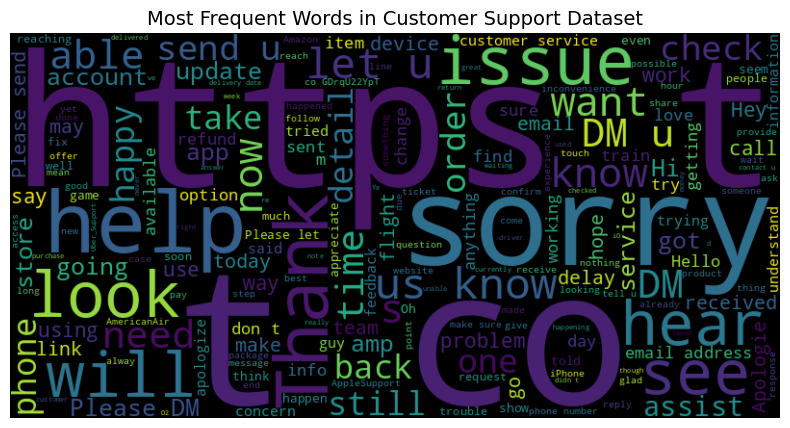

In [50]:
from wordcloud import WordCloud

# Generate Word Cloud
text_data = " ".join(datasets["Customer Support Dataset"]["text"])
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text_data)

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Customer Support Dataset", fontsize=14)
plt.show()


## 🔍 Sentiment Analysis on Customer Support Dataset

### 📊 Customer Support Type Distribution  
We will check how the sentiment labels (-1, 0, 1) are distributed.


### 📌 Step 1: Data Preprocessing



In [51]:
import pandas as pd
import numpy as np

# Load the dataset
df_support = datasets["Customer Support Dataset"].copy()

# Keep only relevant columns
df_support = df_support[['text', 'inbound', 'created_at']]

# Convert 'created_at' to datetime format
df_support['created_at'] = pd.to_datetime(df_support['created_at'])

# # Drop missing values in 'text' column
# df_support.dropna(subset=['text'], inplace=True)

# Display sample data
df_support.head()


<ipython-input-51-7fee460f06a9>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_support['created_at'] = pd.to_datetime(df_support['created_at'])


text  inbound  \
0  @115712 I understand. I would like to assist y...    False   
2  @sprintcare I have sent several private messag...     True   
3  @115712 Please send us a Private Message so th...    False   
4                                 @sprintcare I did.     True   
5  @115712 Can you please send us a private messa...    False   

                 created_at  
0 2017-10-31 22:10:47+00:00  
2 2017-10-31 22:08:27+00:00  
3 2017-10-31 21:54:49+00:00  
4 2017-10-31 21:49:35+00:00  
5 2017-10-31 21:46:24+00:00

### 📌 Step 2: Sentiment Analysis using VADER
-For short customer messages, VADER (Valence Aware Dictionary and sEntiment Reasoner) is a good choice.


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER Lexicon (needed only once)
# nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [ ]:
# Function to get sentiment scores
def get_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return "Positive"
    elif scores['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df_support['sentiment'] = df_support['text'].apply(get_sentiment)

# Display sentiment counts
df_support['sentiment'].value_counts()


In [ ]:
df_support.head()

### 📌 Step 3: Sentiment Trends & Insights
#### 📊 1️⃣ Sentiment Distribution

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df_support['sentiment'], palette="coolwarm")
plt.title("Customer Support Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()


####📈 2️⃣ Sentiment Over Time

In [ ]:
# Group by date and compute sentiment proportions
df_support['date'] = df_support['created_at'].dt.date
sentiment_trend = df_support.groupby(['date', 'sentiment']).size().unstack()

# Plot sentiment trend over time
plt.figure(figsize=(10, 5))
sentiment_trend.plot(kind='line', marker='o', colormap='coolwarm')
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment")
plt.grid()
plt.show()


## 👥 3️⃣ Customer vs. Support Sentiment

In [ ]:
# Split inbound messages
customer_messages = df_support[df_support["inbound"] == True]
support_responses = df_support[df_support["inbound"] == False]

# Compare sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=customer_messages['sentiment'], palette="coolwarm", ax=axes[0])
axes[0].set_title("Customer Sentiment Distribution")
axes[0].set_xlabel("Sentiment")

sns.countplot(x=support_responses['sentiment'], palette="coolwarm", ax=axes[1])
axes[1].set_title("Support Sentiment Distribution")
axes[1].set_xlabel("Sentiment")

plt.show()


##❌ 4️⃣ Most Common Negative Words (Frequent Complaints)

In [ ]:
from wordcloud import WordCloud

# Filter negative tweets
negative_text = " ".join(df_support[df_support['sentiment'] == "Negative"]['text'])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(negative_text)

# Display Word Cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Negative Customer Messages")
plt.show()



In [ ]:
df_support.head()

In [ ]:
# Ensure df_support has the required sentiment column
if 'sentiment' not in df_support.columns:
    print("Error: 'sentiment' column not found in df_support")
else:
    # Ensure both datasets have the same length (if applicable)
    if len(datasets["Customer Support Dataset"]) == len(df_support):
        datasets["Customer Support Dataset"]['sentiment'] = df_support['sentiment'].values
    else:
        print("Warning: The datasets have different lengths. Merging on index.")

        # Merge based on index (if applicable)
        datasets["Customer Support Dataset"] = datasets["Customer Support Dataset"].merge(
            df_support[['sentiment']], left_index=True, right_index=True, how='left'
        )

    # Save the updated dataset for modeling
    datasets["Customer Support Dataset"].to_csv("Customer_Support_Updated.csv", index=False)
    print("Updated Customer Support dataset saved successfully.")

### 🔬 Cross-Dataset Comparison  
We will compare all datasets in terms of:
- Text length distribution  
- Sentiment label balance  
- Common trends in frequent words  


In [ ]:
# Compare text length distributions across datasets
plt.figure(figsize=(10, 6))

for dataset_name, df in datasets.items():
    df["text_length"] = df.iloc[:, 1].apply(len)  # Assuming text column is second
    sns.kdeplot(df["text_length"], label=dataset_name)

plt.title("Text Length Distribution Across Datasets", fontsize=14)
plt.xlabel("Characters per Tweet", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.show()


### 🔍 Key Insights from EDA
Based on our analysis, we can derive:
- Common patterns in sentiment-labeled tweets  
- Typical tweet lengths for different sentiment categories  
- Frequently used words and n-grams  
- Differences in data distribution across datasets  

This will guide **synthetic data generation** by maintaining real-world data properties.
